# COMS21202: Symbols, Patterns and Signals #
**CW1**: *This marked assignment has 3 parts to be undertaken in weeks 17-19 with students working in pairs.*

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## Objectives ##
The goal of this assignment is for you to gain experience with clustering and classifying data. You will be given two sets of data points, each containing values for 5 different attributes (features) derived from an unspecified number of different object classes. One set contains 150 points and you should use it to *train* your classifier. The second set contains 15 points and you should use it to *test* your classifier. A complication is that the training set is **not** labelled - you will need to analyse the feature values, identify two features which are able to separate the different object classes and then cluster the points to obtain class labels which can then be used to train a classifier.

The steps that you should follow are detailed below. You will need to become familiar with several new `Python` commands and so we advise that you make use of the `Python` help facility. You will each be given different data files, with different attribute values, different class parameters and different distinguishing features. Your results will therefore not be the same as that of other students. For those working in pairs you will have to carry out the work for both data sets and be able to explain the differences obtained.

## CW1a (week 17) ##
### 1. ###
Collect your training and test data from SAFE (if you have difficulties in obtaining the dataset, try to use [this one](https://www.ole.bris.ac.uk/bbcswebdav/courses/COMS21202_2017/cw1data.train.txt) first and immediately alert TAs or Lecturers). You then need to identify which two features separate the classes in your training data. The best way of doing this is to visualise the data by plotting the attribute values for each pair of features. Use the `np.loadtxt` command to read in the data and the plotting commands (try `plotmatrix`) to plot attribute values against each other. Visually inspect the results to understand the data and argue which features best separate the classes. Once you identified the two features create a new data matrix `X` holding only those features as columns.

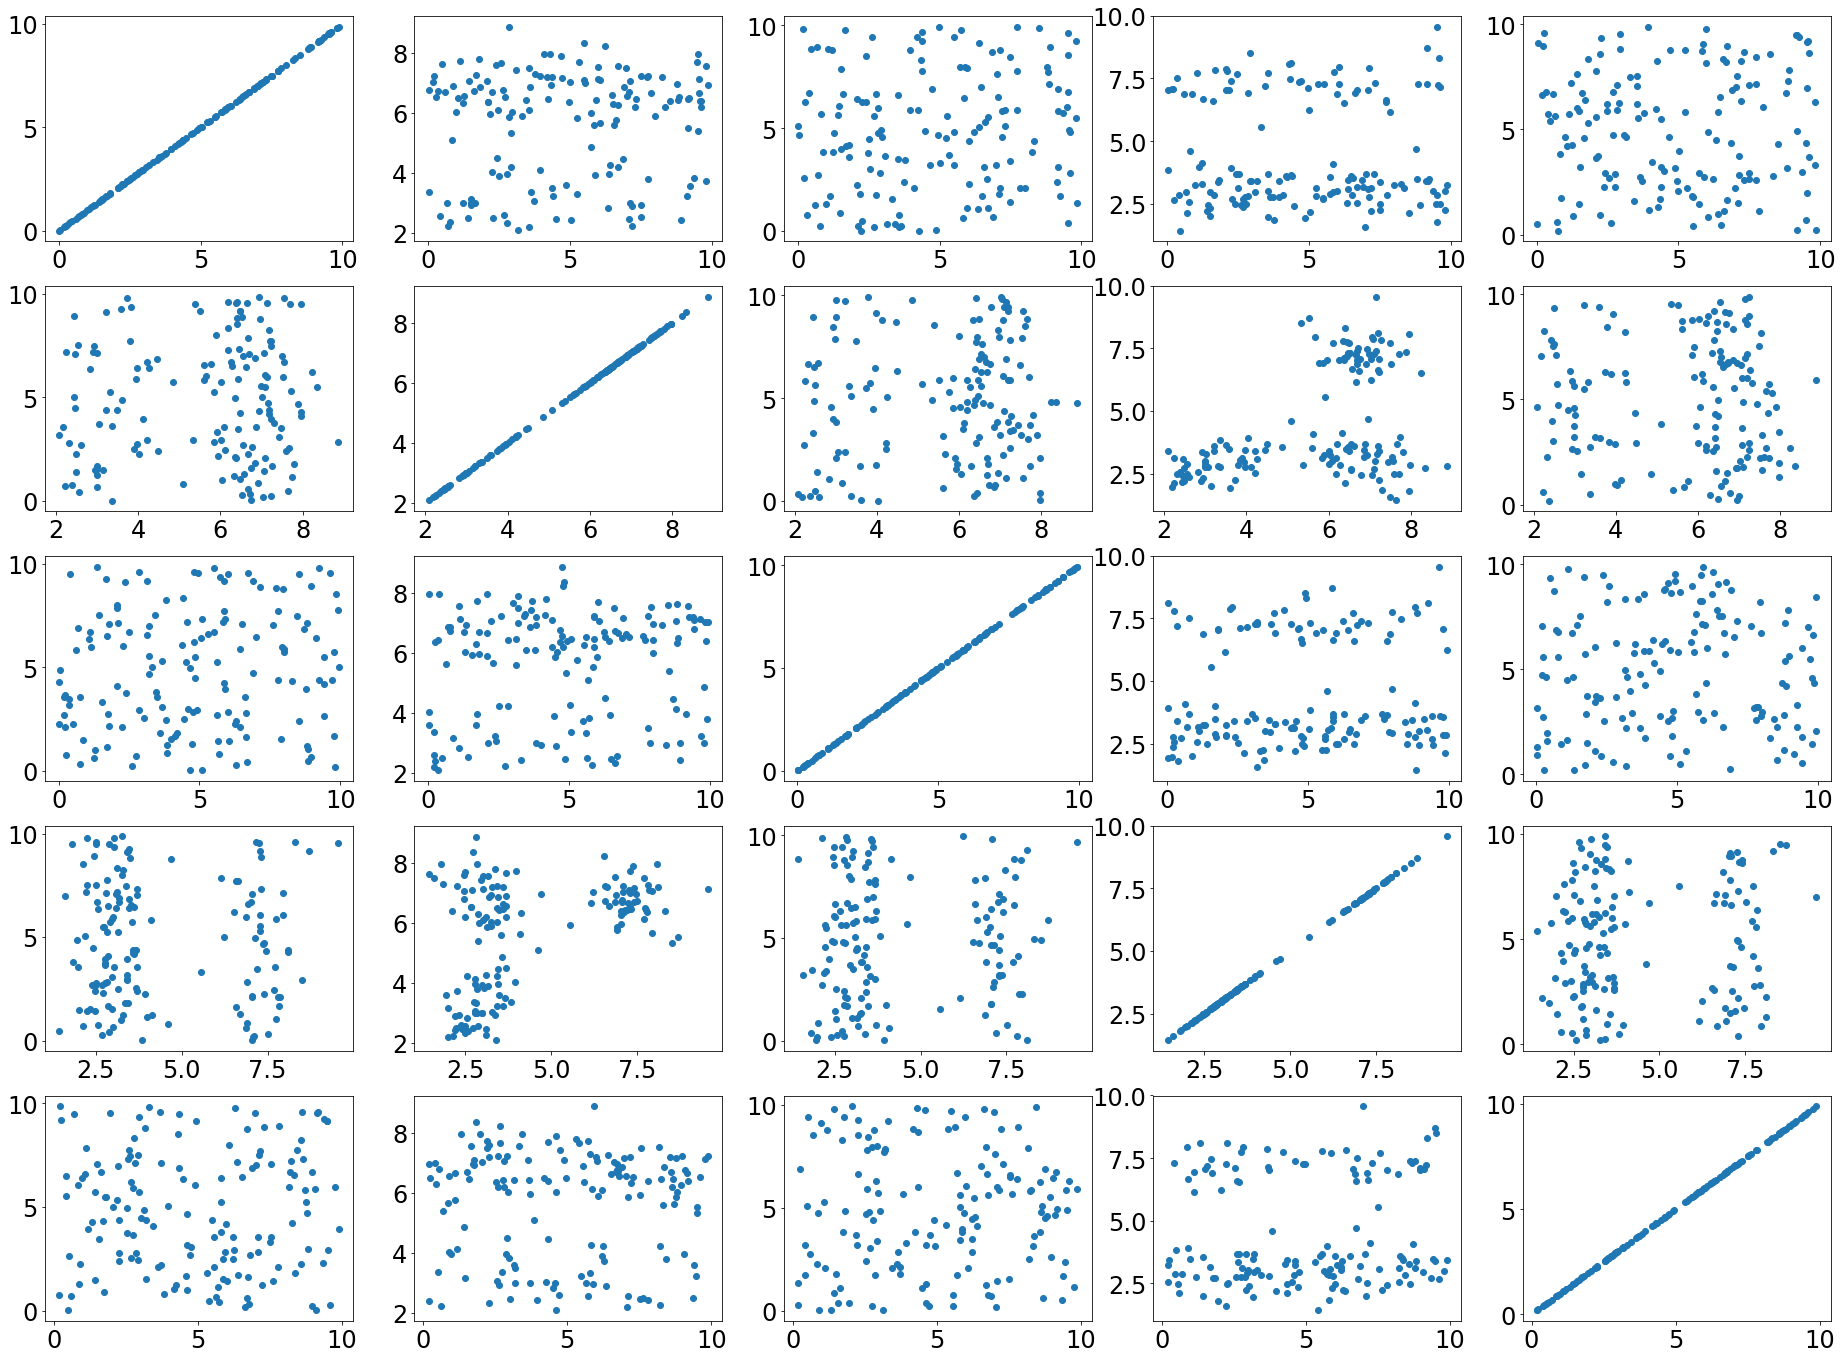

In [3]:
# Plots a matrix with each cell showing a plotted graph of the two features (from row and column)
# This allows us to find which two features are good at separating the data into classes
def plotmatrix(Matrix):
  r, c = Matrix.shape
  fig = plt.figure()
  plotID = 1
  for i in range(c):
    for j in range(c):
      ax = fig.add_subplot( c, c, plotID )
      ax.scatter( Matrix[:,i], Matrix[:,j] )
      plotID += 1
  plt.show()

trainingData = np.loadtxt("ss16161.train")

# I've chosen the cell at row 1 and column 3 (index starting at 0) as it does quite well to separate the data
# into three different classes due to clusters they have formed

feature2 = np.matrix([trainingData[:, 1]]).T
feature4 = np.matrix([trainingData[:, 3]]).T

# Holds all the coordinates between these two features
X = np.append(feature2, feature4, axis = 1)

plotmatrix(trainingData)



### Your comments ###

Features 1 and 4 seem most suitable for classification due to obvious spacing

We use the kmeans function, to find out class labels for each of the features we have decided to use. We receive 0s or 1s which show the different cluster they are in.

### 2. ###
You now need to derive class labels for each of the data points in the training data. You can do this automatically using the K-means algorithm applied to `X`, where *K* is the number of classes you identified in the previous step. Use the function `kmeans` to do this. Next, you want to visualise the outcome of the K-means clustering. One way to do this is to plot each cluster found by K-means in a different colour. To this end, use the vector of cluster indices returned by `kmeans` to store the points for each class in separate matrices by means of the `np.where` command.

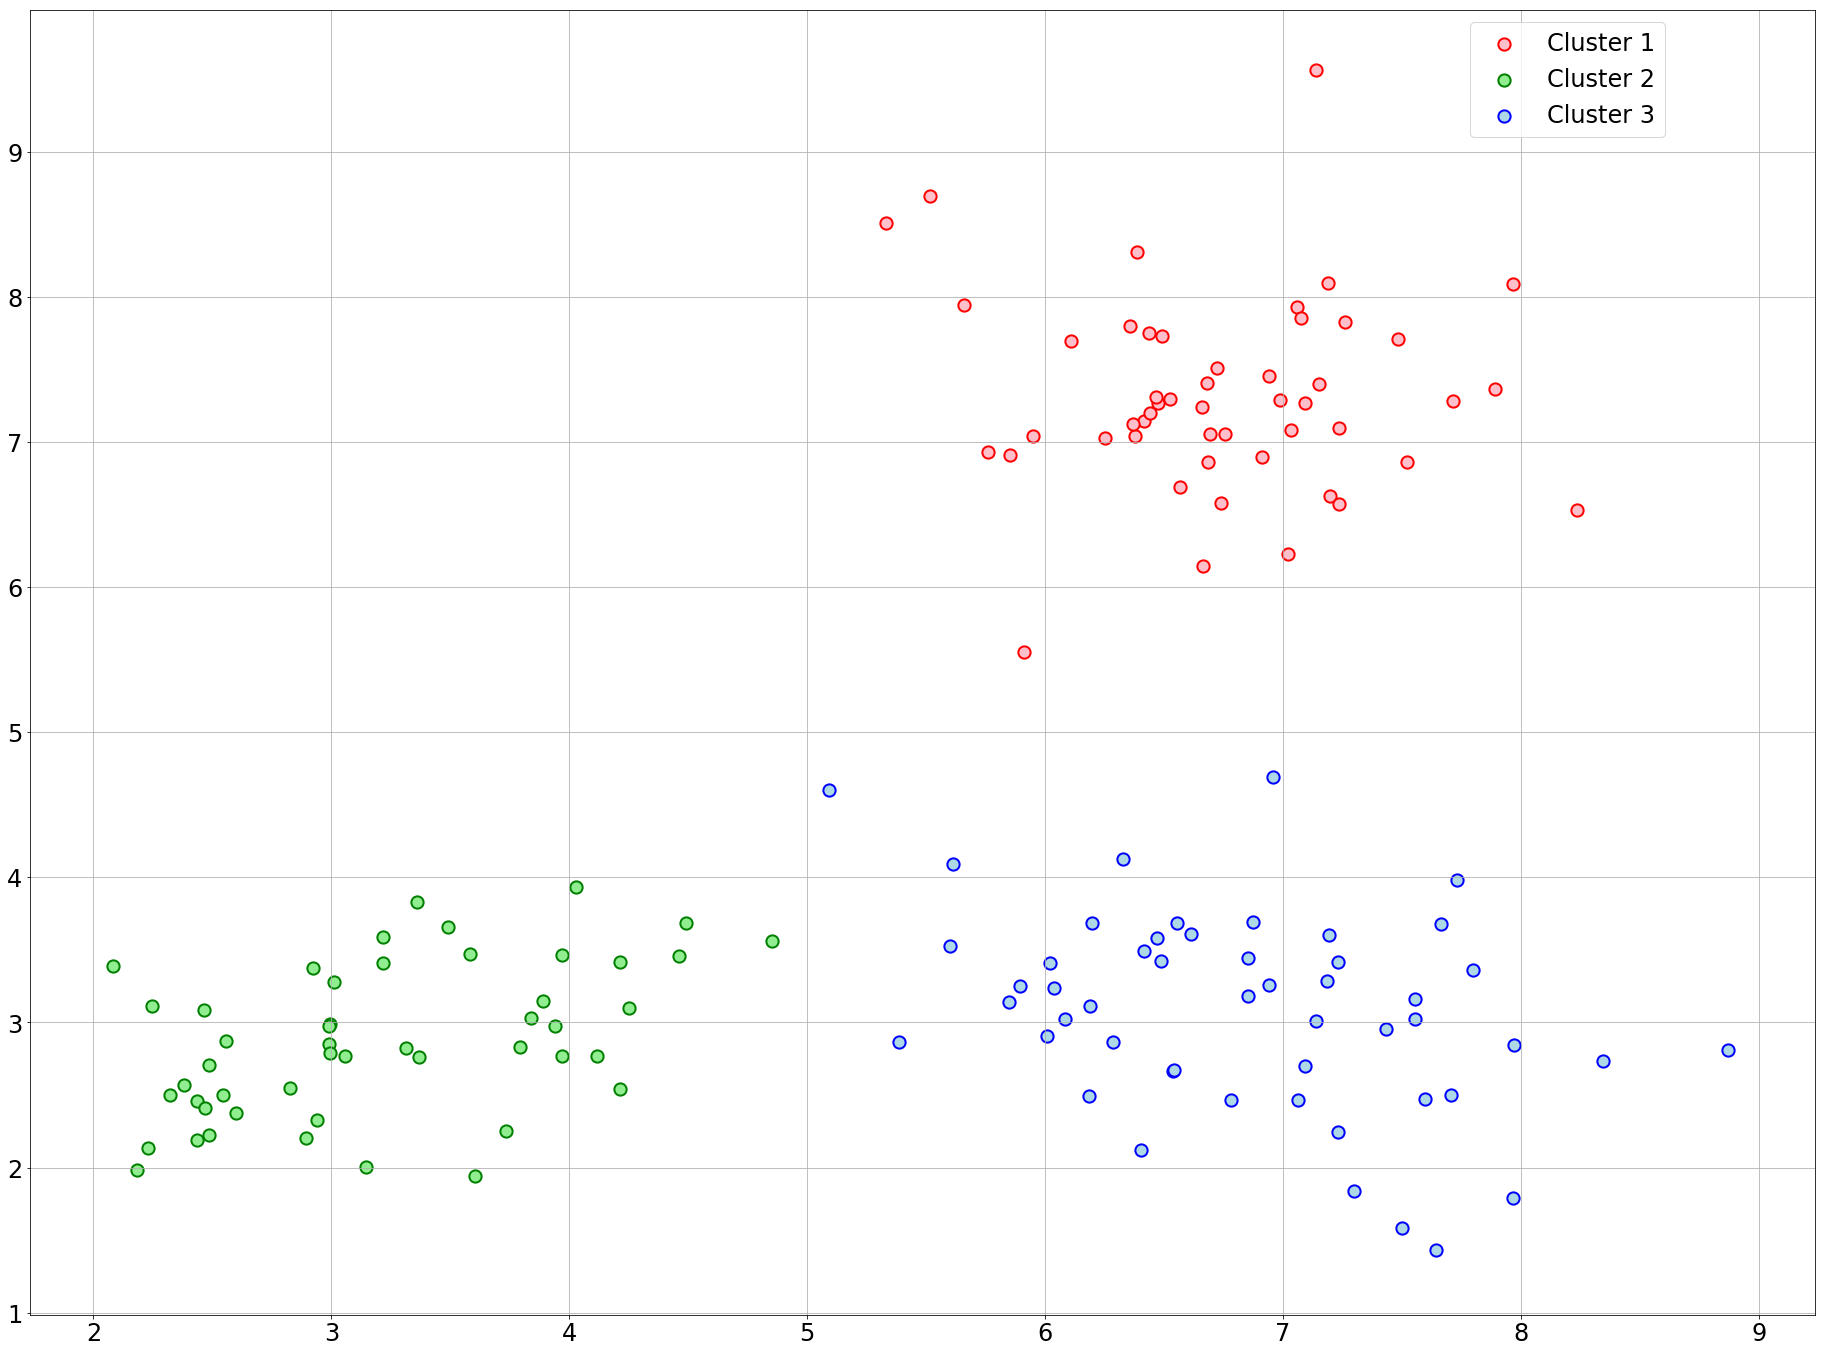

In [4]:
def kmeans(Data, NClusters):
  km = KMeans(NClusters)
  fitted = km.fit(Data)
  return (fitted.cluster_centers_, fitted.labels_, fitted.inertia_)

# Apply kmeans function to separate data and initialise the different output to variables
kMeansOutput = kmeans(X, 3)
clusterCentres = kMeansOutput[0]
clusterLabels = kMeansOutput[1]
clusterSpread = kMeansOutput[2]

# Extract points for each cluster
lbl0 = np.array(np.where(clusterLabels == 0))
lbl1= np.array(np.where(clusterLabels == 1))
lbl2 = np.array(np.where(clusterLabels == 2))

cluster1 = []
cluster2 = []
cluster3 = []

# Convert arrays to matrices

for val in lbl0:
    cluster1.append(X[val])
for val in lbl1:
    cluster2.append(X[val])
for val in lbl2:
    cluster3.append(X[val])

def array2matrix(cluster):
    cluster = np.matrix(cluster[0])
    return cluster

cluster1 = array2matrix(cluster1)
cluster2 = array2matrix(cluster2)
cluster3 = array2matrix(cluster3)

# Plot clusters

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter([cluster1[:,0]], [cluster1[:,1]], s = 150, marker = "o", color = 'pink', label = "Cluster 1", edgecolor='r', linewidth='2')
ax.scatter([cluster2[:,0]], [cluster2[:,1]], s = 150, marker = "o", color = 'lightgreen', label = "Cluster 2", edgecolor='g', linewidth='2')
ax.scatter([cluster3[:,0]], [cluster3[:,1]], s = 150, marker = "o", color = 'lightblue', label = "Cluster 3", edgecolor='b',linewidth='2')

ax.grid()
ax.legend(bbox_to_anchor = (0.8, 1), loc = 2)

plt.show()

### Your comments ###

Each cluster is coloured accordingly. 

### 3. ###
The centroids found by K-means can now be used as a simple nearest-neighbour classifier. Load your test data and select the two relevant features. Using a combination of the `cdist(X, metric='euclidean', p=2)` and `np.argmin` (with `axis` parameter) commands, construct a vector of labels for each of the test points indicating which cluster centroid is the nearest. Plot the test points in the previous plot with the colour indicating their class but a different symbol. The corresponding decision boundaries can be plotted by passing the centroids to the `Voronoi` and `voronoi_plot_2d` functions (remember to set the `ax` parameter of the later one to your current plot).

/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


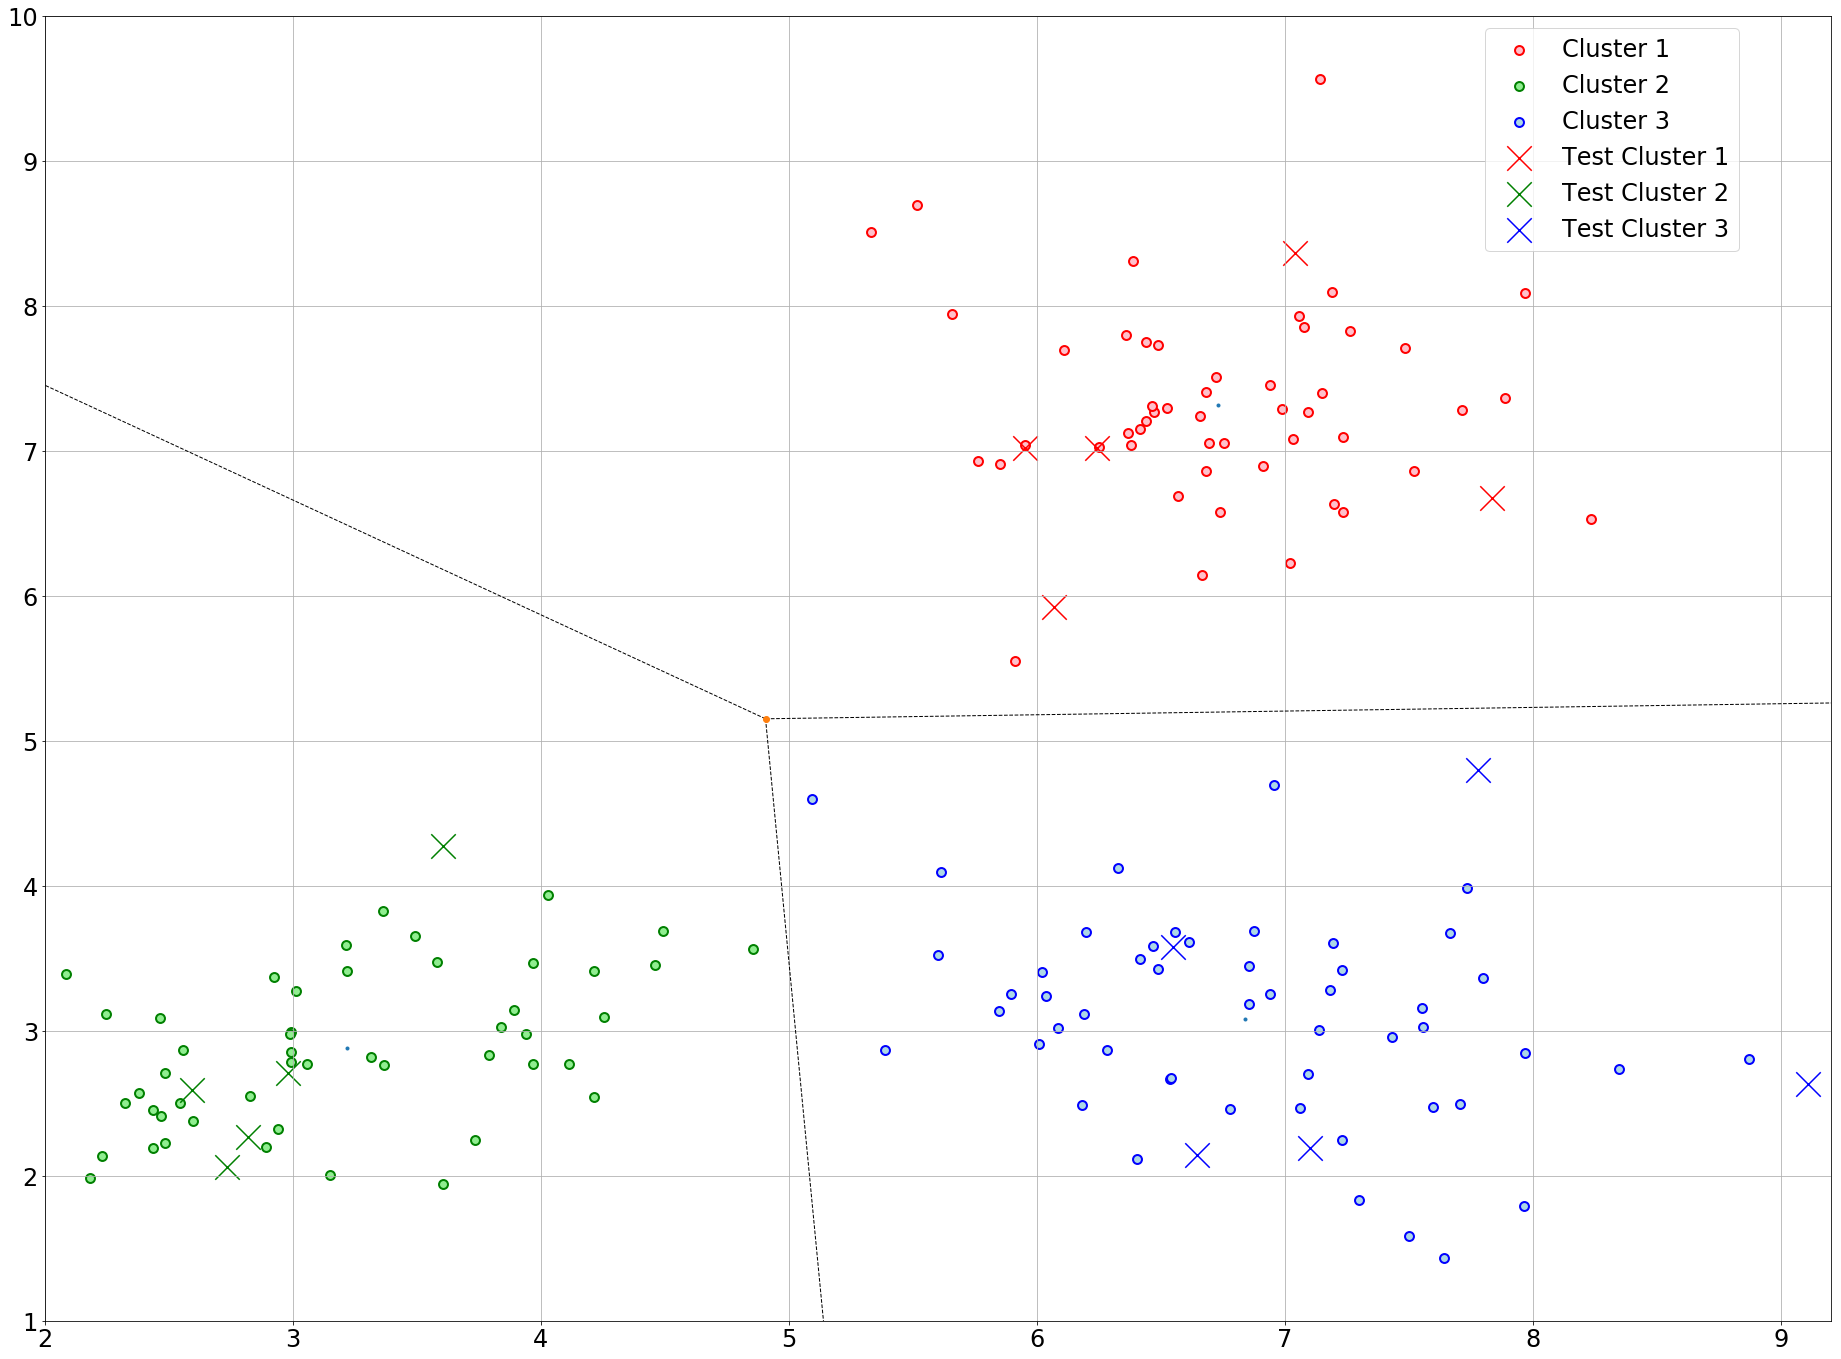

In [5]:
test = np.loadtxt("ss16161.test")

# Load relevant features
testf2 = np.matrix([test[:, 1]]).T
testf4 = np.matrix([test[:, 3]]).T

# Create matrix with both features
testX = np.append(testf2, testf4, axis = 1)

# Find distances of each test point to each cluster centre
distToClusters = cdist(testX, clusterCentres, metric = 'euclidean', p = 2)

# Find closest cluster according to distances
closestCluster = np.argmin(distToClusters, axis = 1)
closestCluster = np.matrix(closestCluster).T

# Extract points and allocate to respective cluster
test0 = np.array(np.where(closestCluster == 0))
test1 = np.array(np.where(closestCluster == 1))
test2 = np.array(np.where(closestCluster == 2))

testCluster1 = []
testCluster2 = []
testCluster3 = []

# Convert arrays to matrices

for val in test0:
    testCluster1.append(testX[val])
for val in test1:
    testCluster2.append(testX[val])
for val in test2:
    testCluster3.append(testX[val])

testCluster1 = array2matrix(testCluster1)
testCluster2 = array2matrix(testCluster2)
testCluster3 = array2matrix(testCluster3)

# Plot clusters

# Get Voronoi according to cluster centres
vor1 = Voronoi(clusterCentres)

fig2 = plt.figure()
ax = fig2.add_subplot(111)

voronoi_plot_2d(vor1, ax)

ax.set_xlim(2, 9.2)
ax.set_ylim(1, 10)

ax.scatter([cluster1[:,0]], [cluster1[:,1]], s = 80, marker = "o", color = 'pink', label = "Cluster 1", edgecolor='r', linewidth='2')
ax.scatter([cluster2[:,0]], [cluster2[:,1]], s = 80, marker = "o", color = 'lightgreen', label = "Cluster 2", edgecolor='g', linewidth='2')
ax.scatter([cluster3[:,0]], [cluster3[:,1]], s = 80, marker = "o", color = 'lightblue', label = "Cluster 3", edgecolor='b',linewidth='2')

ax.scatter([testCluster1[:,0]], [testCluster1[:,1]], s = 600, marker = "x", color = 'r', label = "Test Cluster 1")
ax.scatter([testCluster2[:,0]], [testCluster2[:,1]], s = 600, marker = "x", color = 'g', label = "Test Cluster 2")
ax.scatter([testCluster3[:,0]], [testCluster3[:,1]], s = 600, marker = "x", color = 'b', label = "Test Cluster 3")

ax.grid()
ax.legend(bbox_to_anchor = (0.8, 1), loc = 2)

plt.show()

### Your comments ###

Use clusterCentres to find which points are closest to each of the centres

### 4. ###
Finally, we want you to deliberately find a non-optimal clustering. To this end, use the within-cluster sums of point-to-centroid distances returned by K-means to keep calling K-means until you find a clearly non-optimal value. You may need to change the definition of `kmeans` function and play around with its initialisation parameters. Plot the Voronoi diagram in the same plot to demonstrate non-optimality.

/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


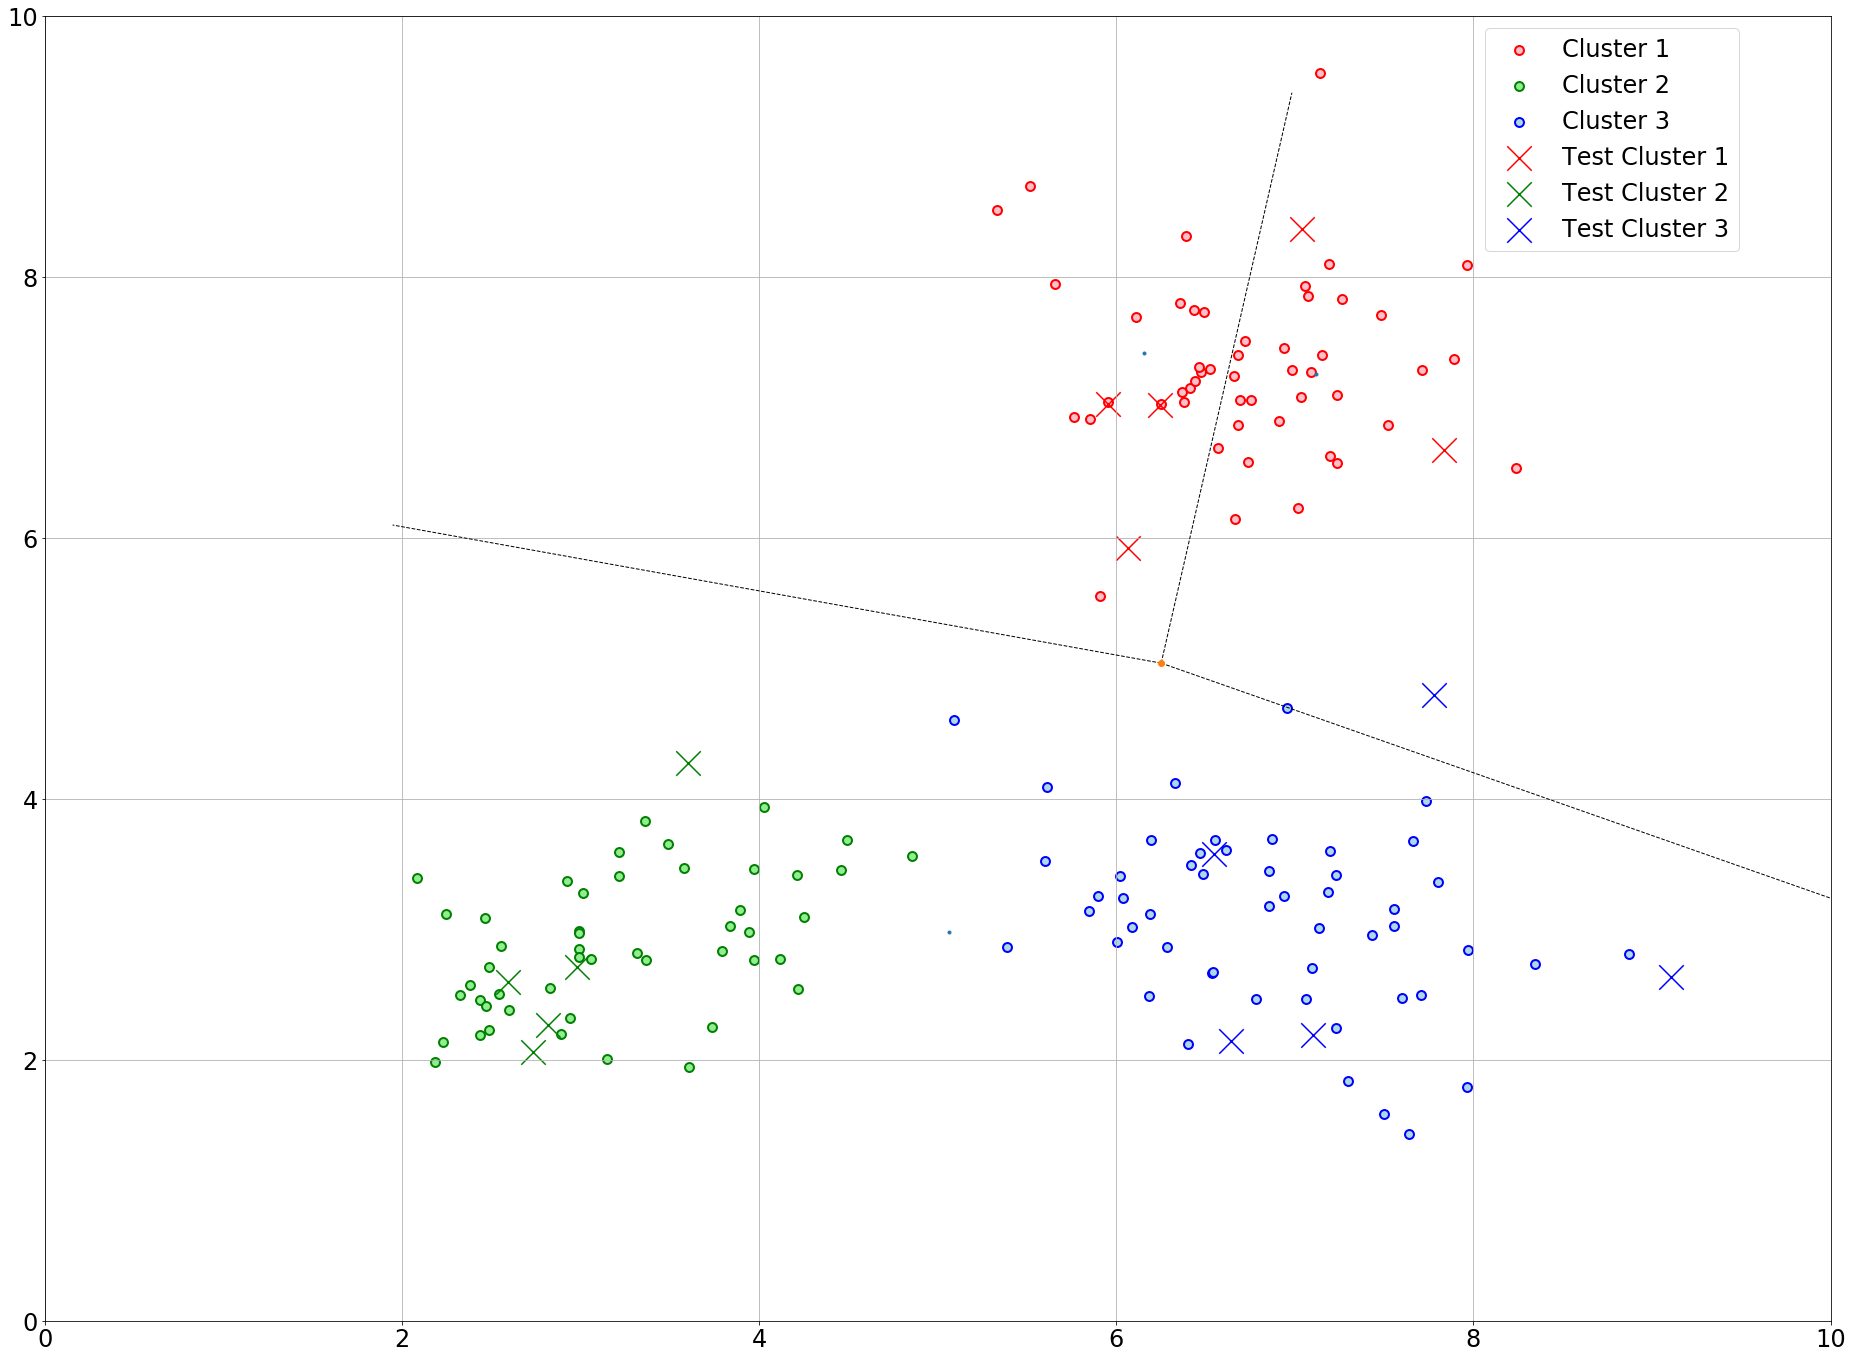

In [6]:
# By running kmeans on the data with a 'random' initiation point, it can end up converging to a non-optimal
# clustering solution

def nonOptimalkmeans(Data, NClusters):
  km = KMeans(NClusters, init='random', n_init=1)
  fitted = km.fit(Data)
  return (fitted.cluster_centers_, fitted.labels_, fitted.inertia_)

#nonOptimalkmeans(X, 3)
returnArrays = []
inertiaValues = []

# Repeat kmeans with 200 different initiation points
for x in range(0, 200):
    returnArrays.append(nonOptimalkmeans(X,3))
    inertiaValues.append(returnArrays[x][2])

# Choose the clustering solution with the highest inertia/spread which shows it is non-optimal
maxInertia = max(inertiaValues)

# Find the clustering definition for which the spread is highest
for x in range(0, len(returnArrays)):
    if (returnArrays[x][2] == maxInertia):
        maxKMean = returnArrays[x]
        break

# Plot non-optimal Voronoi on top of previous plot to show non-optimality
vor2 = Voronoi(maxKMean[0])

fig3 = plt.figure()
ax = fig3.add_subplot(111)

voronoi_plot_2d(vor2, ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.scatter([cluster1[:,0]], [cluster1[:,1]], s = 80, marker = "o", color = 'pink', label = "Cluster 1", edgecolor='r', linewidth='2')
ax.scatter([cluster2[:,0]], [cluster2[:,1]], s = 80, marker = "o", color = 'lightgreen', label = "Cluster 2", edgecolor='g', linewidth='2')
ax.scatter([cluster3[:,0]], [cluster3[:,1]], s = 80, marker = "o", color = 'lightblue', label = "Cluster 3", edgecolor='b',linewidth='2')

ax.scatter([testCluster1[:,0]], [testCluster1[:,1]], s = 600, marker = "x", color = 'r', label = "Test Cluster 1")
ax.scatter([testCluster2[:,0]], [testCluster2[:,1]], s = 600, marker = "x", color = 'g', label = "Test Cluster 2")
ax.scatter([testCluster3[:,0]], [testCluster3[:,1]], s = 600, marker = "x", color = 'b', label = "Test Cluster 3")

ax.grid()
ax.legend(bbox_to_anchor = (0.8, 1), loc = 2)

plt.show()



### Your comments ###

Start K-Means from random initial point 

## CW1b (week 18) ##
The simple nearest-centroid classifier you constructed in the previous assignment leads to linear decision boundaries between each pair of classes, as visualised by the Voronoi diagram. We now want you to contrast and compare this with a maximum-likelihood classifier.

### 1. ###
Model the data in each class as being generated from a 2-D Normal Distribution. Estimate the class means and covariances from the labelled training data using the `np.mean` (remember about `axis` parameter) and `np.cov` functions. Visualise the estimated distributions by plotting contours of the `stats.multivariate_normal.pdf` functions of each class. Choose the contour level such that 95% of the probability mass is within the ellipse. Use as a starting point that for bivariate random distributions the points on this contour satisfy the equation
$$ (x-\mu)^{T} * \Sigma^{-1} * (x-\mu) / 2 = 3 $$
and use this to find the appropriate density for the contour level. `Python` functions to use include `plt.contour` and `np.meshgrid`.

**Clarification:** this basically tells you to draw an ellipse at squared Mahalanobis distance 6. Why 6 (actually 5.99)? This comes from the fact that sums of squared Gaussians follow a Chi-squared distribution, so we use the inverse of the Chi-squared cumulative distribution with 2 degrees of freedom. You can verify this in `Python` by the query `stats.chi2.ppf(0.95, 2)` which gives 5.9915. This is the 2-D equivalent of saying that in 1-D, 95% of the Gaussian probability mass is within +/- 2 standard deviations from the mean (actually 1.96). More information at the following links:  
* [http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/](http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/)
* [http://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall06/reading/gaussians.pdf](http://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall06/reading/gaussians.pdf)

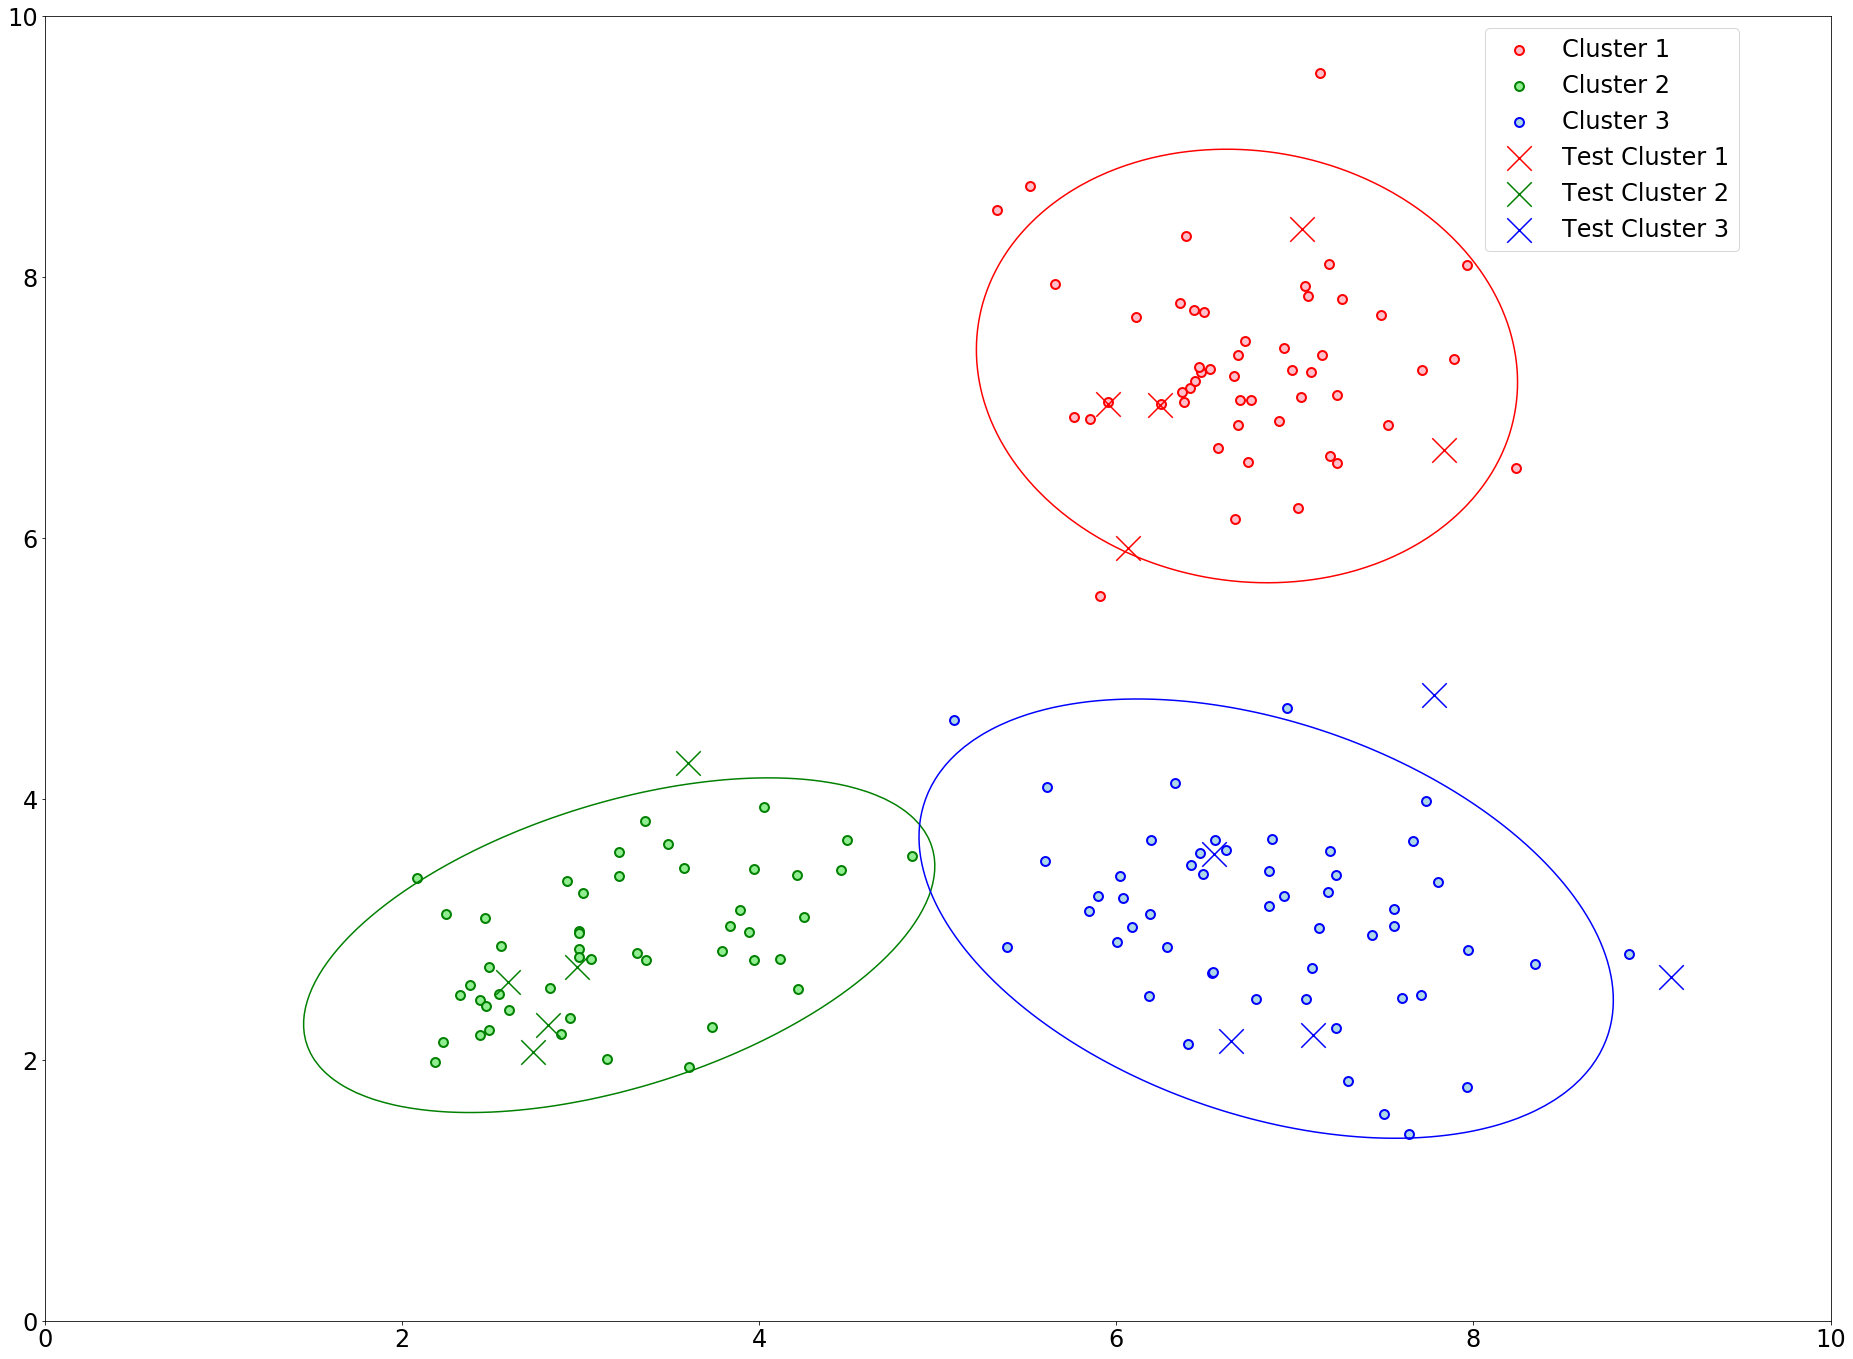

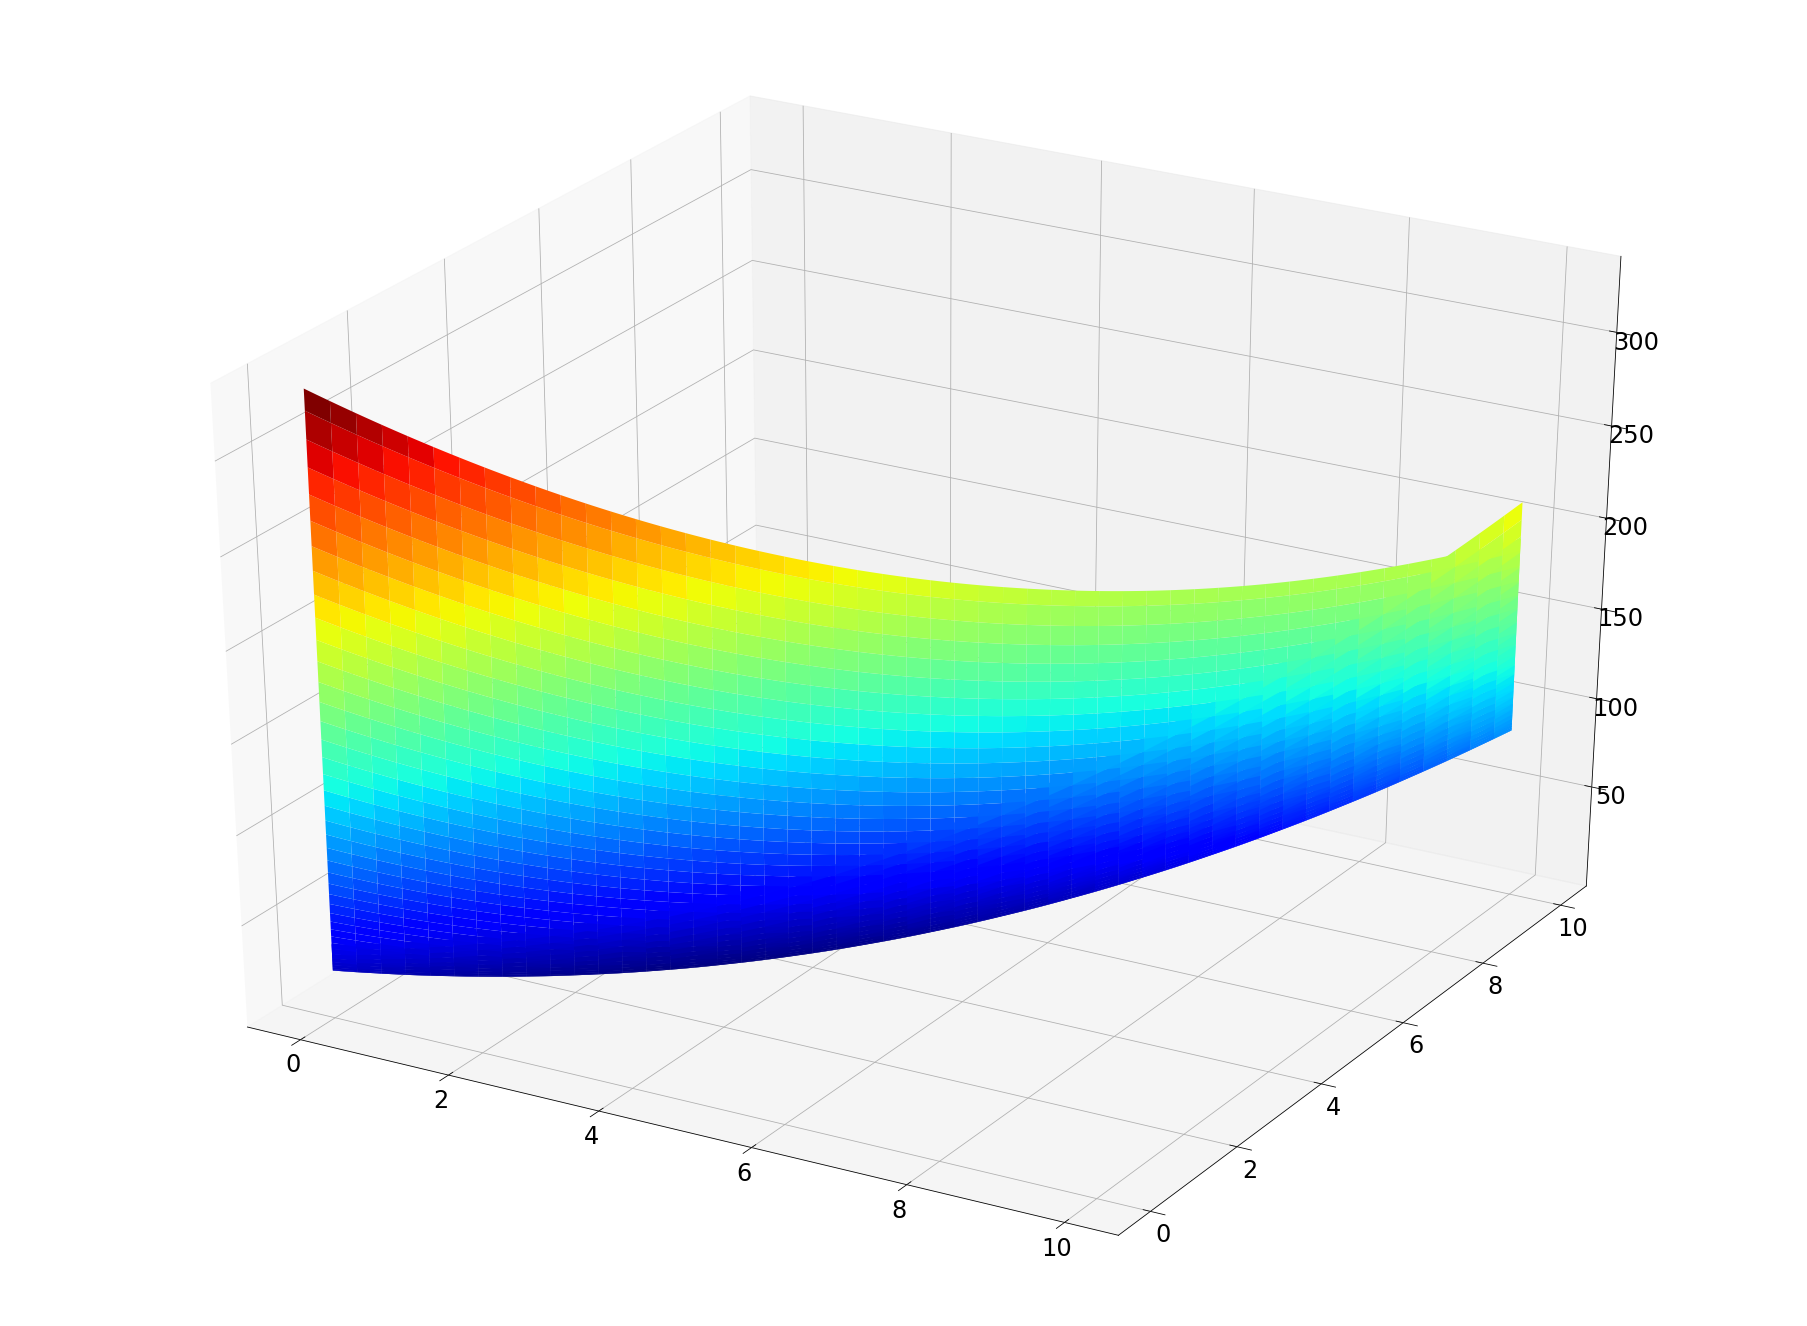

In [15]:
############## Extracting data ##############

# Put classes into NP arrays
class1 = np.array(cluster1)
class2 = np.array(cluster2)
class3 = np.array(cluster3)

# Get mean of each class
c1_mean = np.mean(class1, axis = 0)
c2_mean = np.mean(class2, axis = 0)
c3_mean = np.mean(class3, axis = 0)

# Get covariance of each class
c1_cov = np.cov(class1, rowvar=False)
c2_cov = np.cov(class2, rowvar=False)
c3_cov = np.cov(class3, rowvar=False)


'''# Create grids of all pairs of values
c1_xx, c1_yy = np.meshgrid(c1_xs, c1_ys)
c2_xx, c2_yy = np.meshgrid(c2_xs, c2_ys)
c3_xx, c3_yy = np.meshgrid(c3_xs, c3_ys)

# Use column stack to zip tbogether all possible coordinates
c1_xys = np.column_stack((c1_xx.flat, c1_yy.flat))
c2_xys = np.column_stack((c2_xx.flat, c2_yy.flat))
c3_xys = np.column_stack((c3_xx.flat, c3_yy.flat))'''

################# Functions ##################

# Changing the equation to align with the one above to get contour points satisfying the Mahalanobis distance of 6
def getChiProb(x, y, mu, sigma):
    vec = np.matrix([x, y])
    mua = np.matrix(mu)
    P = ((vec-mua) * np.linalg.inv(sigma) * (vec.T-mua.T))
    return float(P)

def getProb(x, y, mu, sigma):
    vec = np.matrix([x, y])
    mua = np.matrix(mu)
    E = 2.0 * np.pi * np.sqrt(np.linalg.det(sigma))
    P = (1/E) * np.exp(-1 * ((vec-mua) * np.linalg.inv(sigma) * (vec.T-mua.T) / 2.0))
    return float(P)

############## Calculating coordinates ##############

linspace = np.linspace(0, 10, 500)
xx, yy = np.meshgrid(linspace, linspace)

xys = np.column_stack((xx.flat, yy.flat))

# Get x and y values from 0 to 10 in steps of 0.05. We will find the pdfs for each of these coordinates
x = np.arange(0, 10, 0.05)
y = np.arange(0, 10, 0.05)

p1 = np.zeros((len(x), len(y)))
p2 = np.zeros((len(x), len(y)))
p3 = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        p1[j, i] = getChiProb(x[i], y[j], c1_mean, c1_cov)
        p2[j, i] = getChiProb(x[i], y[j], c2_mean, c2_cov)
        p3[j, i] = getChiProb(x[i], y[j], c3_mean, c3_cov)


# Get pdfs for every pair
c1_zs = stats.multivariate_normal.pdf(xys, c1_mean, c1_cov).reshape(xx.shape)
c2_zs = stats.multivariate_normal.pdf(xys, c2_mean, c2_cov).reshape(xx.shape)
c3_zs = stats.multivariate_normal.pdf(xys, c3_mean, c3_cov).reshape(xx.shape)

############### Plotting graph ################

# Use this chi value for contour to hold 95% of the data within the ellipse
chi = stats.chi2.ppf(0.95, 2)

fig4 = plt.figure()
ax = fig4.add_subplot(111)

# Plot contours
c1_contour = plt.contour(x, y, p1, [chi], colors='red')
c2_contour = plt.contour(x, y, p2, [chi], colors='green')
c3_contour = plt.contour(x, y, p3, [chi], colors='blue')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Plot train and test points
ax.scatter([cluster1[:,0]], [cluster1[:,1]], s = 80, marker = "o", color = 'pink', label = "Cluster 1", edgecolor='r', linewidth='2')
ax.scatter([cluster2[:,0]], [cluster2[:,1]], s = 80, marker = "o", color = 'lightgreen', label = "Cluster 2", edgecolor='g', linewidth='2')
ax.scatter([cluster3[:,0]], [cluster3[:,1]], s = 80, marker = "o", color = 'lightblue', label = "Cluster 3", edgecolor='b',linewidth='2')

ax.scatter([testCluster1[:,0]], [testCluster1[:,1]], s = 600, marker = "x", color = 'r', label = "Test Cluster 1")
ax.scatter([testCluster2[:,0]], [testCluster2[:,1]], s = 600, marker = "x", color = 'g', label = "Test Cluster 2")
ax.scatter([testCluster3[:,0]], [testCluster3[:,1]], s = 600, marker = "x", color = 'b', label = "Test Cluster 3")

ax.legend(bbox_to_anchor = (0.8, 1), loc = 2)

fig3d = plt.figure()
ax2 = fig3d.add_subplot(111, projection='3d')
ax2.plot_surface(x, y, p2, cmap=cm.jet)

plt.show()


### Your comments ###



### 2. ###
Now plot the decision boundaries between each pair of classes. This can be done once again using the `plt.contour` function, this time on each of the three pairwise likelihood ratios. Visually inspect the decision boundaries and make sure you understand why they have a particular shape. Also check whether this maximum-likelihood classifier disagrees with the nearest-centroid classifier on any of the test or training points (for both your data sets if you're working in pairs).

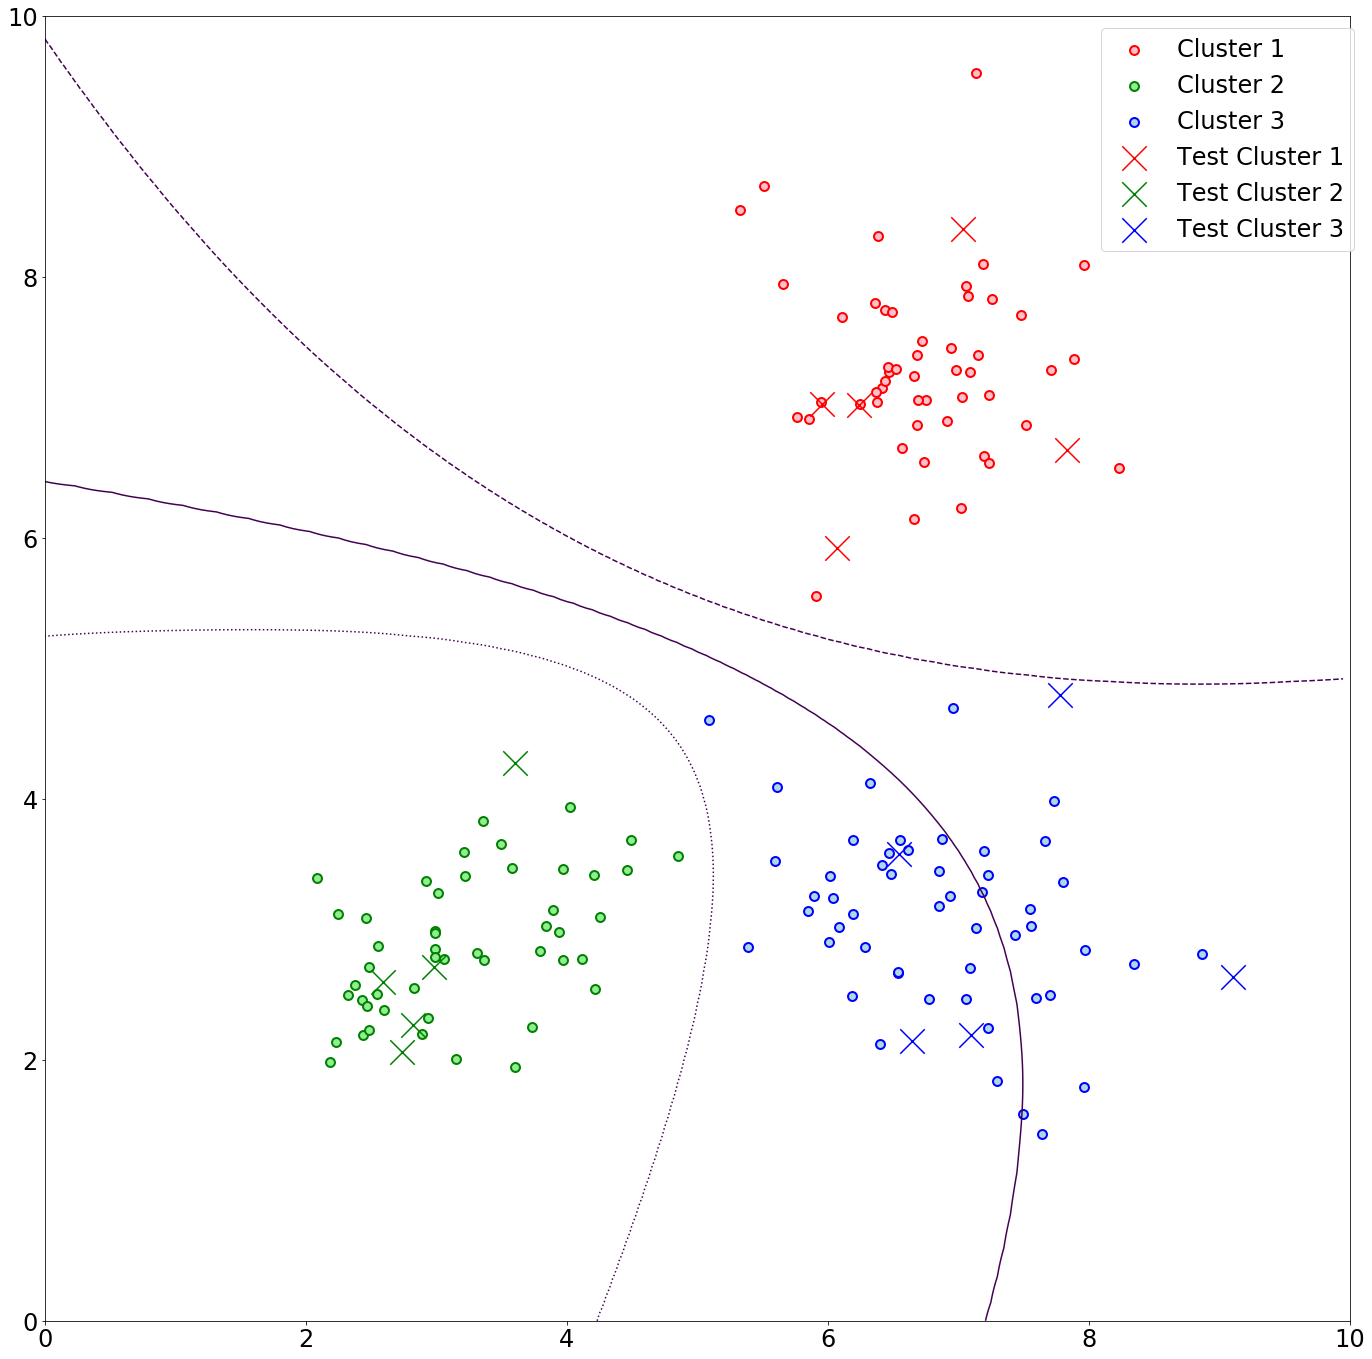

In [18]:
decision1 = np.zeros((len(x), len(y)))
decision2 = np.zeros((len(x), len(y)))
decision3 = np.zeros((len(x), len(y)))

# Get pdf for each coordinate from each cluster
for i in range(len(x)):
    for j in range(len(y)):
        decision1[j, i] = getProb(x[i], y[j], c1_mean, c1_cov)
        decision2[j, i] = getProb(x[i], y[j], c2_mean, c2_cov)
        decision3[j, i] = getProb(x[i], y[j], c3_mean, c3_cov)
        
# Calculate the pairwise likelihood ratios by dividing the coordinates by each other
likelihoodRatio1 = np.divide(decision1, decision2)
likelihoodRatio2 = np.divide(decision1, decision3)
likelihoodRatio3 = np.divide(decision2, decision3)

fig5 = plt.figure()
ax = fig5.add_subplot(111, aspect='equal')

# Plot contours

c1_contour = plt.contour(x, y, likelihoodRatio1, [0.5])                      # Red and Green clusters
c2_contour = plt.contour(x, y, likelihoodRatio2, [0.5], linestyles='dashed') # Red and Blue clusters
c3_contour = plt.contour(x, y, likelihoodRatio3, [0.5], linestyles='dotted') # Green and Blue clusters

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Plot train and test points
ax.scatter([cluster1[:,0]], [cluster1[:,1]], s = 80, marker = "o", color = 'pink', label = "Cluster 1", edgecolor='r', linewidth='2')
ax.scatter([cluster2[:,0]], [cluster2[:,1]], s = 80, marker = "o", color = 'lightgreen', label = "Cluster 2", edgecolor='g', linewidth='2')
ax.scatter([cluster3[:,0]], [cluster3[:,1]], s = 80, marker = "o", color = 'lightblue', label = "Cluster 3", edgecolor='b',linewidth='2')

ax.scatter([testCluster1[:,0]], [testCluster1[:,1]], s = 600, marker = "x", color = 'r', label = "Test Cluster 1")
ax.scatter([testCluster2[:,0]], [testCluster2[:,1]], s = 600, marker = "x", color = 'g', label = "Test Cluster 2")
ax.scatter([testCluster3[:,0]], [testCluster3[:,1]], s = 600, marker = "x", color = 'b', label = "Test Cluster 3")

ax.legend(bbox_to_anchor = (0.8, 1), loc = 2)

plt.show()



### Your comments ###

Put here any comments

### 3. ###
How would you have to change the maximum-likelihood classifier so that its decision boundaries are the same as the ones for nearest-centroid? And how would you change it if you know that one of the three classes is twice as likely as the other two? Demonstrate the effect graphically.

/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


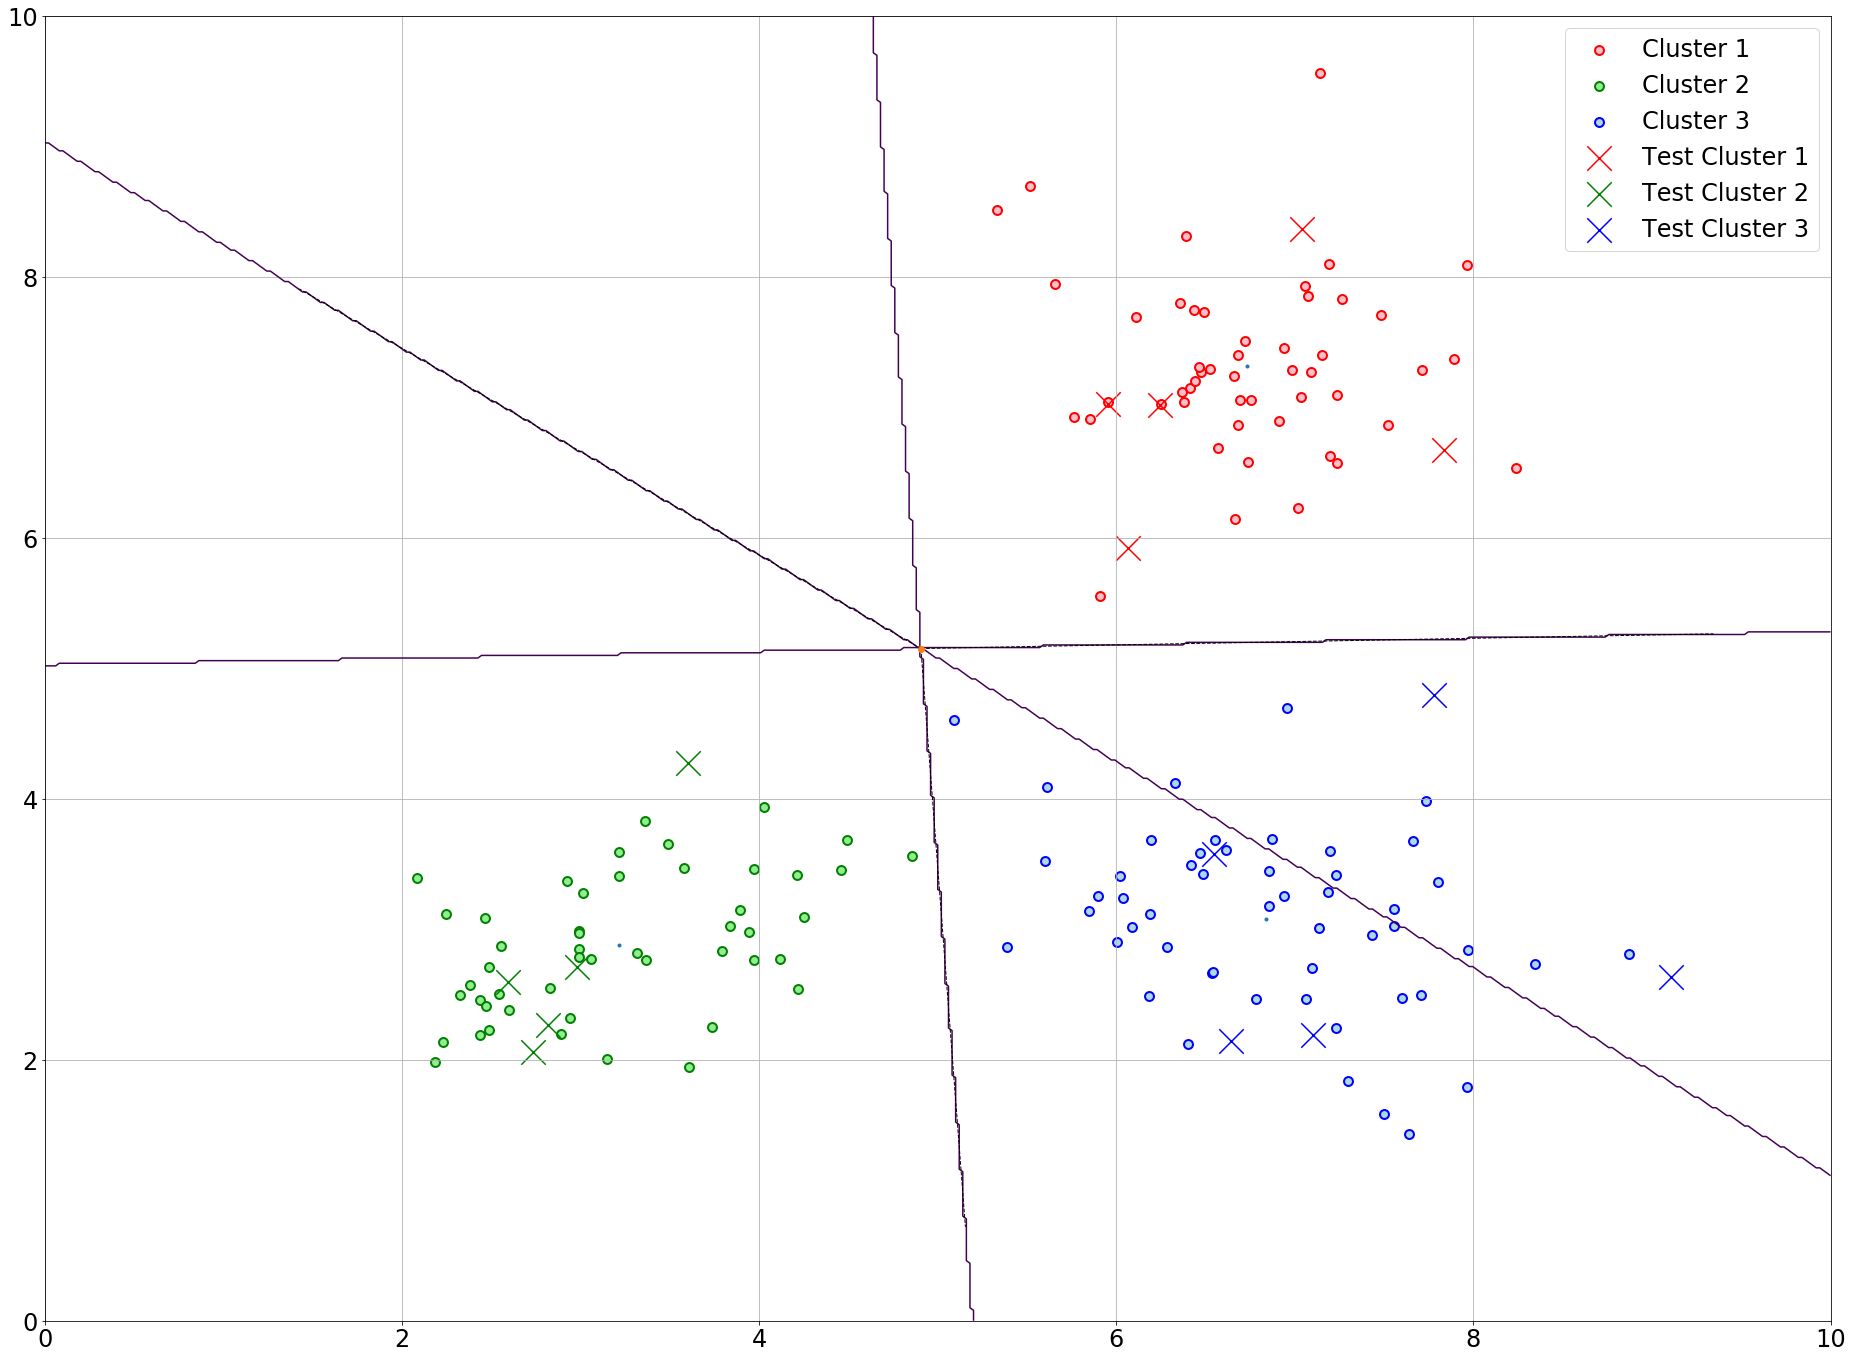

In [17]:
#####################################
## CREATE NEW PDFS WITH ID COV MATRIX

covIdentity = np.diag([1, 1])
cls_1_id_pdfs = stats.multivariate_normal.pdf( xys, c1_mean, covIdentity ).reshape(xx.shape)
cls_2_id_pdfs = stats.multivariate_normal.pdf( xys, c2_mean, covIdentity ).reshape(xx.shape)
cls_3_id_pdfs = stats.multivariate_normal.pdf( xys, c3_mean, covIdentity ).reshape(xx.shape)



#################################
## WORK OUT NEW LIKELIHOOD RATIOS

LR12_id = cls_1_id_pdfs > cls_2_id_pdfs
LR23_id = cls_2_id_pdfs > cls_3_id_pdfs
LR13_id = cls_1_id_pdfs > cls_3_id_pdfs



#################
## PLOT THE GRAPH
fig_6 = plt.figure()
ax = fig_6.add_subplot( 111 )

plt.contour( xx, yy, LR12_id, [0.5],  )
plt.contour( xx, yy, LR23_id, [0.5] )
plt.contour( xx, yy, LR13_id, [0.5] )

# Plot train and test points
ax.scatter([cluster1[:,0]], [cluster1[:,1]], s = 80, marker = "o", color = 'pink', label = "Cluster 1", edgecolor='r', linewidth='2')
ax.scatter([cluster2[:,0]], [cluster2[:,1]], s = 80, marker = "o", color = 'lightgreen', label = "Cluster 2", edgecolor='g', linewidth='2')
ax.scatter([cluster3[:,0]], [cluster3[:,1]], s = 80, marker = "o", color = 'lightblue', label = "Cluster 3", edgecolor='b',linewidth='2')

ax.scatter([testCluster1[:,0]], [testCluster1[:,1]], s = 600, marker = "x", color = 'r', label = "Test Cluster 1")
ax.scatter([testCluster2[:,0]], [testCluster2[:,1]], s = 600, marker = "x", color = 'g', label = "Test Cluster 2")
ax.scatter([testCluster3[:,0]], [testCluster3[:,1]], s = 600, marker = "x", color = 'b', label = "Test Cluster 3")


#Add a Voronoi to compare if similar
vor = Voronoi( clusterCentres )
voronoi_plot_2d( vor, ax )

ax.set_xlim( 0, 10 )
ax.set_ylim( 0, 10 )
ax.grid( True, which='both' )
ax.legend()
plt.show()


### Your comments ###

Put here any comments



## CW1c (week 19) ##
You now need to write a report which describes, explains and analyses the work you have done for **CW1a** and **CW1b**. The aim of this report is to demonstrate your understanding of methods you used and the results that you have obtained. This will be useful training for the CW2 assignment which is entirely assessed through a report.

As this is not a `Python` programming assignment you are not allowed to use any `Python` code in your report. So, rather than "The program then calls `kmeans(data,3)` and stores the result in `some_var`" you should write something like "we then applied K-means clustering to this data set to obtain K=3 clusters".

The report should be **no more than 4 pages long using no less than 11 point font** and should be submitted in `pdf` format on SAFE. You will continue to work in pairs and at least one of you should upload the report. Make sure that the submitted report clearly identifies the authors.

We suggest you use the following headings in the report (but this is not prescriptive):
1. Introduction
2. Feature selection
3. Identifying the classes
4. Nearest-centroid classification
5. Maximum-likelihood classification
6. Discussion of results
7. Sources used

Notice how these sections don't map one-to-one to the questions above, but rather concentrate on telling a 'story'. In each section you should briefly explain what the question is, how you approached it and what the results are. We will expect you to include plots generated by `Python`, but these should not take more than about *one-third of the report*. Each plot should have a numbered caption with a succinct description. You need to include plots for both datasets assigned to you and your partner.

**To gain high marks your report will need to demonstrate a good understanding of the tasks and the methods used, backed up by a clear explanation of your experimental results.**